<h3>Name: Trần Đại Chí</h3>
<h3>Student ID: 18127070</h3>

# PCA

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

df = pd.read_csv('featuresdf.csv')
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [2]:
#remove column not numeric for PCA
df1 = df.drop(columns=['id', 'name', 'artists', 'key', 'mode'])
normalize_data = StandardScaler().fit_transform(df1.values)
normalize_data

array([[ 1.0299491 , -0.06273942,  1.37735817, ..., -0.83506335,
         0.46887132,  0.10050378],
       [-0.0226592 ,  1.11407601,  0.73877574, ..., -1.08839983,
         0.31939023,  0.10050378],
       [-0.29585525,  0.90470394,  0.49951647, ...,  2.1080407 ,
         0.30020795,  0.10050378],
       ...,
       [ 0.27464238, -1.38394939, -0.87747919, ..., -0.72770275,
        -1.62147757,  0.10050378],
       [-0.3119256 , -0.52480193,  0.41864795, ..., -0.32817465,
        -0.10968718,  0.10050378],
       [-3.52599674, -1.61498064, -0.52444628, ...,  2.18750048,
         0.6306205 ,  0.10050378]])

In [3]:
pca_data = PCA(n_components=2).fit_transform(normalize_data)
df2 = pd.DataFrame(data=pca_data, columns = ['pca data 1', 'pca data 2'])
df3 = pd.concat([df2, df['name']], axis=1)
df3.head()

,pca data 1,pca data 2,name
0,-1.753657,-2.623852,Shape of You
1,-1.639614,-0.903948,Despacito - Remix
2,-0.623870,0.808255,Despacito (Featuring Daddy Yankee)
3,0.405360,0.232484,Something Just Like This
4,-1.218843,-0.504031,I'm the One


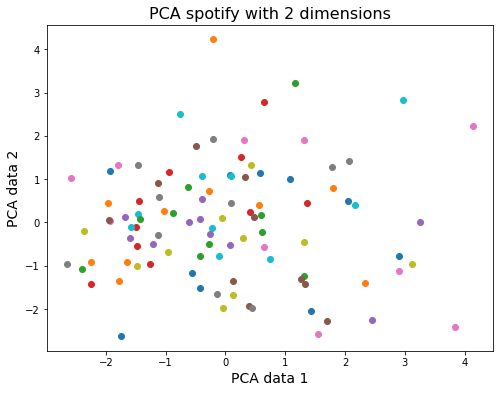

In [4]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('PCA data 1', fontsize = 14)
ax.set_ylabel('PCA data 2', fontsize = 14)
ax.set_title('PCA spotify with 2 dimensions', fontsize = 16)
for i in df['name']:
    ax.scatter(df3.loc[df3['name']==i, 'pca data 1'], df3.loc[df3['name']==i, 'pca data 2'])
ax.plot();

In [5]:
tnse_data = TSNE(n_components=2).fit_transform(normalize_data)
df4 = pd.DataFrame(data=tnse_data, columns = ['tsne data 1', 'tsne data 2'])
df5 = pd.concat([df4, df['name']], axis=1)
df5.head()

,tsne data 1,tsne data 2,name
0,-7.442365,-3.789054,Shape of You
1,-6.969955,-1.497270,Despacito - Remix
2,0.775350,1.017448,Despacito (Featuring Daddy Yankee)
3,-3.456098,1.761416,Something Just Like This
4,-7.803243,-0.487309,I'm the One


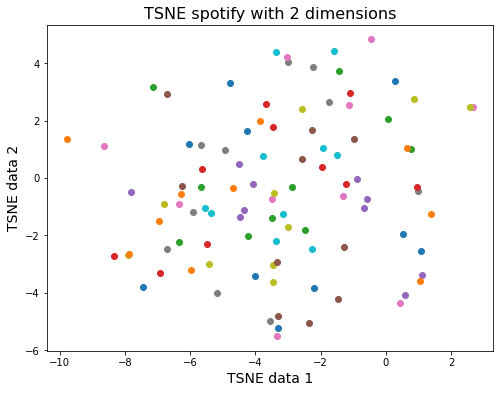

In [6]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('TSNE data 1', fontsize = 14)
ax.set_ylabel('TSNE data 2', fontsize = 14)
ax.set_title('TSNE spotify with 2 dimensions', fontsize = 16)
for i in df['name']:
    ax.scatter(df5.loc[df5['name']==i, 'tsne data 1'], df5.loc[df5['name']==i, 'tsne data 2'])
ax.plot();

# So sánh TSNE với PCA
- TSNE xử lý các outlier tốt hơn so với PCA
- TSNE là 1 thuật toán giảm chiều phi tuyến tính còn PCA là 1 thuật toán giảm chiều tuyến tính
- TNSE bảo toàn cấu trúc cục bộ của dữ liệu trong khi đó PCA bảo toàn cấu trúc toàn cục của dữ liệu
- TSNE hoạt động tốt hơn so với PCA
- TSNE có độ phức tạp tính toán cao hơn so với PCA nên không thể sử dụng trong trường hợp dữ liệu có kích thước lớn
- TSNE là 1 thuật toán không xác định trong khi đó PCA là 1 thuật toán xác định nên mỗi lần chạy TSNE sẽ cho ra 1 kết quả khác nhau
- TSNE cần sự điều chỉnh các siêu tham số cho phù hợp trong khi đó PCA thì không liên quan đến các siêu tham số